In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import io

In [18]:
from google.colab import files  # colab에서 csv파일을 사용하기 위한 라이브러리
myfile = files.upload()

Saving test.csv to test (1).csv


In [16]:
myfile2 = files.upload()

Saving train.csv to train (1).csv


In [19]:
#pd.read_csv로 csv파일 불러오기
train = pd.read_csv(io.BytesIO(myfile2['train.csv']))
test = pd.read_csv(io.BytesIO(myfile['test.csv']))

In [20]:
train.shape, test.shape # 자료의 전체적인 행과 열

((891, 12), (418, 11))

In [21]:
train.head(), train.tail()

(   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 0            1         0       3  ...   7.2500   NaN         S
 1            2         1       1  ...  71.2833   C85         C
 2            3         1       3  ...   7.9250   NaN         S
 3            4         1       1  ...  53.1000  C123         S
 4            5         0       3  ...   8.0500   NaN         S
 
 [5 rows x 12 columns],
      PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
 886          887         0       2  ...  13.00   NaN         S
 887          888         1       1  ...  30.00   B42         S
 888          889         0       3  ...  23.45   NaN         S
 889          890         1       1  ...  30.00  C148         C
 890          891         0       3  ...   7.75   NaN         Q
 
 [5 rows x 12 columns])

In [22]:
train.head(5), train.tail(5) # train의 앞 정보 5개, 뒷 정보 5개

(   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 0            1         0       3  ...   7.2500   NaN         S
 1            2         1       1  ...  71.2833   C85         C
 2            3         1       3  ...   7.9250   NaN         S
 3            4         1       1  ...  53.1000  C123         S
 4            5         0       3  ...   8.0500   NaN         S
 
 [5 rows x 12 columns],
      PassengerId  Survived  Pclass  ...   Fare Cabin  Embarked
 886          887         0       2  ...  13.00   NaN         S
 887          888         1       1  ...  30.00   B42         S
 888          889         0       3  ...  23.45   NaN         S
 889          890         1       1  ...  30.00  C148         C
 890          891         0       3  ...   7.75   NaN         Q
 
 [5 rows x 12 columns])

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# 결측치 확인
train.isnull().sum() # 나타나는 결측치를 모두 채워줘야 머신러닝으로 제대로 된 예측이 가능

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Age의 결측치 채워넣기

In [32]:
sex_mean = train.groupby('Sex')['Age'].mean() #sex_mean 은 성별의 평균/ groupby는 'Sex'를 기준으로 그룹을 만듦, 그리고 그 그룹별로 Age 값을 뽑아냄/ mean()으로 뽑아낸 값을 평균냄.
print(sex_mean)

train.loc[(train['Sex'] == 'female') & (train['Age'].isnull()), "Age"] = int(sex_mean[0])
# train의 Sex가 female이고 'Age'값이 결측치이면 sex_mean의 0번째 값을 넣어준다.
train.loc[(train['Sex'] == 'male') & (train['Age'].isnull()), "Age"] = int(sex_mean[1])
# train의 Sex가 male이고, 'Age'값이 결측치이면 sex_mean의 1번째 값을 넣어준다.

train['Age'] = train['Age'].apply(lambda x:round(x)) # lambda 인자 : 표현식 > def x:
                                                                                 # round(x)

train.head(40)

Sex
female    27.757962
male      30.564991
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


### Cabin의 결측치 채워넣기

In [35]:
train['Cabin'].value_counts()   # train.Cabin.value_counts() 

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
C22 C26        3
              ..
C111           1
C106           1
B4             1
E34            1
D28            1
Name: Cabin, Length: 147, dtype: int64

In [42]:
# 맨 앞의 알파벳 추출하기
train['Cabin'] = train['Cabin'].fillna('N') # 결측치를 'N'으로 채워주시오
train['Cabin'] = train['Cabin'].apply(lambda x:x[0]) # 해당 값을 0번째 값으로만 채워주시오.

train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S
5,6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,N,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,N,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,N,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,N,C


### Embarked 결측치 채워 넣기



In [43]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
train['Embarked'].isnull().sum()

2

In [45]:
train['Embarked'] = train['Embarked'].fillna('S')

### 생존자, 사망자 인원수 출력

In [47]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
train['Survived_label'] = train['Survived'].replace(0, 'Dead').replace(1, 'Survived')
train[['Survived','Survived_label']].head()    # 'Survived_label'이라는 새로운 컬럼을 만들어, 'Survived'의 0은 'Dead', 1은 'Survived'로 명시

,Survived,Survived_label
0,0,Dead
1,1,Survived
2,1,Survived
3,1,Survived
4,0,Dead


### 전체 생존율 구하기

In [49]:
 train['Survived_label'].value_counts()

Dead        549
Survived    342
Name: Survived_label, dtype: int64

In [52]:
temp = train['Survived_label'].value_counts()
survival_rate = temp[1]/(temp[0]+temp[1])*100   # 생존율은 Survived/(Dead+Survived)*100

print(f'생존율은 {survival_rate:.1f}% 입니다.')

생존율은 38.4% 입니다.


### 생존자 시각화하기

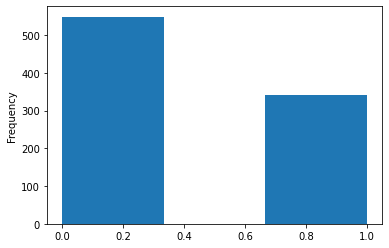

In [55]:
train['Survived'].plot(kind="hist", bins=3) # bins는 히스토그램의 한 구간

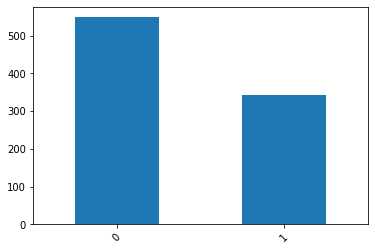

In [56]:
train['Survived'].value_counts().plot(kind='bar', rot='45')

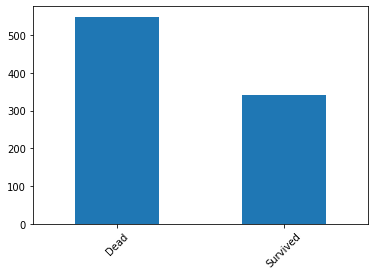

In [57]:
train['Survived_label'].value_counts().plot(kind='bar', rot='45')

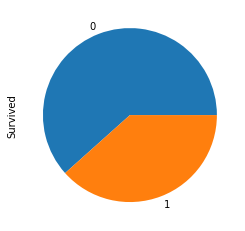

In [58]:
train['Survived'].value_counts().plot(kind='pie')

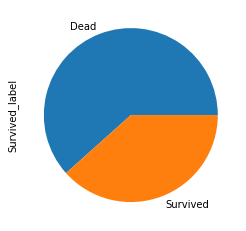

In [59]:
train['Survived_label'].value_counts().plot(kind='pie')

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


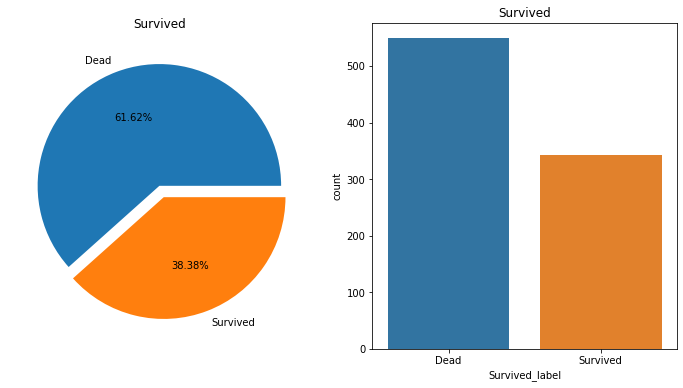

In [70]:
### 추가보충 아래 그래프 이해하기

f, ax = plt.subplots(1,2,figsize=(12,6))

train['Survived_label'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%', ax=ax[0])
# explode 는 파이 조각이 돌출되는 크기. 0이면 돌출되지 않음 / ax는 subplot 위치
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived_label', data= train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### 객실 데이터 정리 및 시각화

In [66]:
# First Class는 1, Business는 2, Economy는 3
train['Pclass_label'] = train['Pclass'].replace(1,'First Class').replace(2, 'Business').replace(3,'Economy')
train[['Pclass','Pclass_label']].head()

,Pclass,Pclass_label
0,3,Economy
1,1,First Class
2,3,Economy
3,1,First Class
4,3,Economy


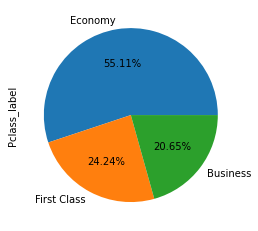

In [67]:
train['Pclass_label'].value_counts().plot(kind='pie', autopct='%1.2f%%') # autopct는 파이 조각의 전체 대비 백분율

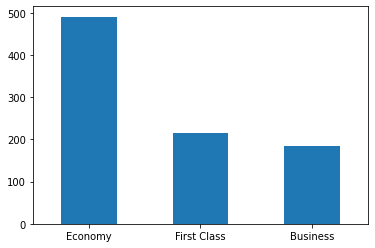

In [74]:
train['Pclass_label'].value_counts().plot(kind='bar', rot='0') # rot는 하단 글자 라벨의 기울기

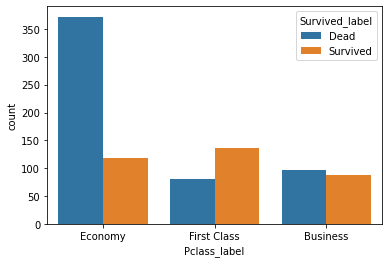

In [75]:
sns.countplot(data = train, x = 'Pclass_label', hue='Survived_label')

### 출발지 데이터 정리 및 시각화하기

In [76]:
train['Embarked_label'] = train['Embarked'].replace('S','Southampton').replace('C','Cherbourg').replace('Q','Queenstown')

train[['Embarked', 'Embarked_label']].head()

,Embarked,Embarked_label
0,S,Southampton
1,C,Cherbourg
2,S,Southampton
3,S,Southampton
4,S,Southampton


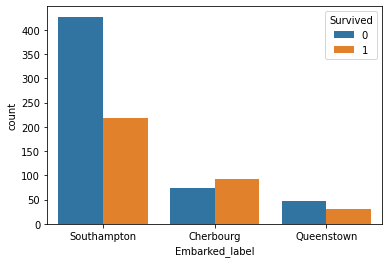

In [77]:
sns.countplot(data=train, x="Embarked_label", hue='Survived')